# 4-4: Sparse Categorical Cross Entropy

## Code.4.4.1: SCCE Calculation

In [8]:
import tensorflow as tf

# one-hot encoding이 아니고, 실제 값 자체가 들어있는 형태에서 활용
from tensorflow.keras.losses import SparseCategoricalCrossentropy

batch_size, n_class = 16, 5

# 결과 데이터는 N x k 형태, 그에따른 matrix 설정
predictions = tf.random.uniform(shape=(batch_size, n_class), minval=0, maxval=1, dtype=tf.float32)

# 확률의 합은 모두 1이되어야 함
# column vector 생성
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))
print(predictions.shape, pred_sum.shape)

# 실질적인 확률 계산(각 값 / 합계)
predictions = predictions/pred_sum

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)

# print(labels) 

loss_object = SparseCategoricalCrossentropy()
loss = loss_object(labels, predictions)

print(loss.numpy())

# 위 값과 동일한 내용 확인 가능
ce = 0
for label, prediction in zip(labels, predictions):
  # print(label, prediction)
  ce += -tf.math.log(prediction[label])
ce /= batch_size # 나누어야 평균을 구함
print(ce.numpy())

(16, 5) (16, 1)
2.014523
2.014523


### Code.4-4-2. SCCE with Model/Dataset
- Dataset 안에 data label(index)가 들어있을 때 어떻게 Output layer가 만들어지고 loss가 계산되는지

(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(16, 3) (16, 1)
(12, 3) (12, 1)


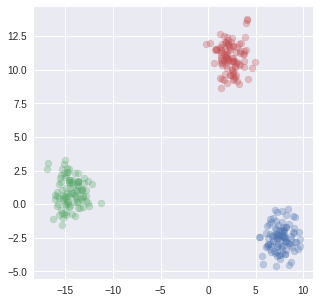

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

plt.style.use('seaborn')

N, n_feature = 100, 2
n_class = 3

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, 1), dtype=tf.int32)

fig, ax = plt.subplots(figsize=(5, 5))
for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))

  x1 = center[0] + tf.random.normal(shape=(N, 1))
  x2 = center[1] + tf.random.normal(shape=(N, 1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N, 1), dtype=tf.int32)

  ax.scatter(x[:, 0].numpy(), x[:, 1].numpy(), alpha=0.3)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

# print(f"X(shape/dtype/data): {X.shape}, {X.dtype}, {X.numpy()}")
# print(f"Y(shape/dtype/data): {Y.shape}, {Y.dtype}, {Y.numpy()}")

dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = SparseCategoricalCrossentropy()

for x, y in dataset:
  predictions = model(x)
  loss = loss_object(y, predictions)
  print(predictions.shape, y.shape)

# 4.5: Categorical Cross Entropy
- one-hot encoding

## Code.4-5-1: CCE Calculation

In [27]:
import tensorflow as tf

from tensorflow.keras.losses import CategoricalCrossentropy

batch_size, n_class = 16, 5

# 결과 데이터는 N x k 형태, 그에따른 matrix 설정
predictions = tf.random.uniform(shape=(batch_size, n_class), minval=0, maxval=1, dtype=tf.float32)

# 확률의 합은 모두 1이되어야 함
# column vector 생성
pred_sum = tf.reshape(tf.reduce_sum(predictions, axis=1), (-1, 1))
print(predictions.shape, pred_sum.shape)

# 실질적인 확률 계산(각 값 / 합계)
predictions = predictions/pred_sum

labels = tf.random.uniform(shape=(batch_size, ),
                           minval=0, maxval=n_class,
                           dtype=tf.int32)


# print(labels)
labels = tf.one_hot(labels, n_class)
print(labels)

# y가 one-hot encoding이 되어 있을 때 사용 가능
loss_object = CategoricalCrossentropy()
loss = loss_object(labels, predictions)
print(f"CCE(Tensorflow): {loss.numpy()}")

cce_man = -tf.reduce_mean(tf.reduce_sum(labels*tf.math.log(predictions), axis=1))
print(f"CCE(Manual): {cce_man.numpy()}")

(16, 5) (16, 1)
tf.Tensor(
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]], shape=(16, 5), dtype=float32)
CCE(Tensorflow): 1.6435346603393555
CCE(Manual): 1.6435346603393555


## Code.4-5-2: CCE with Model/Dataset

In [33]:
import tensorflow as tf
from tensorflow.keras.losses import CategoricalCrossentropy

N, n_feature = 8,2
n_class = 5

X = tf.zeros(shape=(0, n_feature))
Y = tf.zeros(shape=(0, ), dtype=tf.int32)

for class_idx in range(n_class):
  center = tf.random.uniform(minval=-15, maxval=15, shape=(2, ))

  x1 = center[0] + tf.random.normal(shape=(N,1))
  x2 = center[1] + tf.random.normal(shape=(N,1))

  x = tf.concat((x1, x2), axis=1)
  y = class_idx * tf.ones(shape=(N,), dtype=tf.int32)

  X = tf.concat((X, x), axis=0)
  Y = tf.concat((Y, y), axis=0)

Y = tf.one_hot(Y, depth=n_class, dtype=tf.int32)
dataset = tf.data.Dataset.from_tensor_slices((X, Y))
dataset = dataset.batch(batch_size)

model = Dense(units=n_class, activation='softmax')
loss_object = CategoricalCrossentropy()

for x,y in dataset:
  predictions = model(x)
  # print(y.shape, predictions.shape)
  # loss = loss_object(y, predictions)
  print(loss.numpy())

1.6435347
1.6435347
1.6435347
